# **WHY PATIENTS DO NOT SHOW UP FOR THEIR APPOINTMENTS**


## BY: CHARITY DIOH

### **Investigation Overview**

In this investigation, I wanted to look at factors tht can be used to ascertain the reasons why patients do not show up for their appointments. The main focus was on the influence of factors such as Scholarship, SMS Received, Handicap and Age.


### **Dataset Overview**

The dataset consisted of 110,527 patients  with 14 features (Patient ID, Appointment ID, Gender, Scheduled_Day, Appointement_Day, Age, neighbourhood, Scholarship, Hypertension, Diabetes, Alcohoism, Handicap, SMS_received, No_Show). 2 features were removed due to their non relevance to my analysis.

In [1]:
# importing statements for all the packages i plan to use

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Load the clean data and print out a few lines

df = pd.read_csv("C:/Users/ADMIN/Desktop/Charity/PROJECT 3/no-show-cleaned.csv")

### **No Show Distribtion** 

The No show distribution shows the number of patients that showed up for their appointment versus those that did not show up. This is represented by a Yes or No. So its either the patient showed up to the appointment represented by a 'NO' or the patient did not show up reperesented by a 'Yes'.

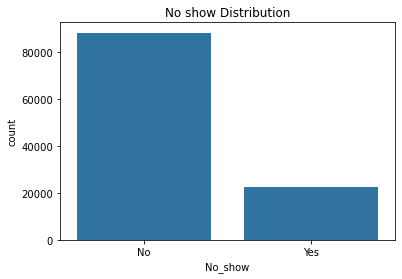

In [3]:
#plotting a count plot for the No show column

base_color = sns.color_palette()[0]
sns.countplot(data = df, x ='No_show', color=base_color,).set(title ='No show Distribution');

The barchart clearly shows that less than 50% of the entire population did not show up for the appointment. Now, that I know the number of persons that showed up or did not show up. 

I filtered my dataset to reflect only those who did not show up for their appointment. Since they are my patients of interest in this analysis.

In [4]:
# filtering and creating a dataframe to reflect only the YES in the No_show column

Did_Not_show_up = df[df['No_show'] == 'Yes']

### **Distribution of Age and Handicap**

In this patient population, their age ranges from 0 to 115. For the purpose of this analysis, i considered Age 0 to be the age of the Newborns. The Handicap population has a category of 0 to 4 (0, 1, 2, 3, 4). Here, I considered 0 to be Non Handicaps (those without any form of disability), then 1 to 4 denotes the number of disability each patient has.

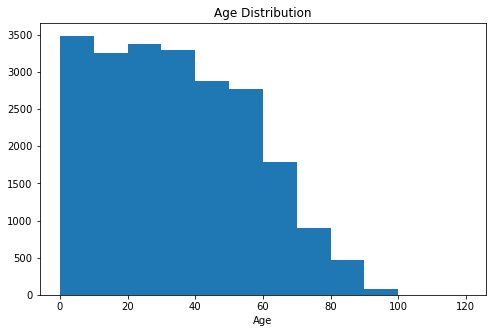

In [5]:
# plotting Age on a standard scale
binsize = 10
bins = np.arange(0, Did_Not_show_up['Age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = Did_Not_show_up, x = 'Age', bins = bins)
plt.title("Age Distribution")
plt.xlabel('Age')
plt.show()

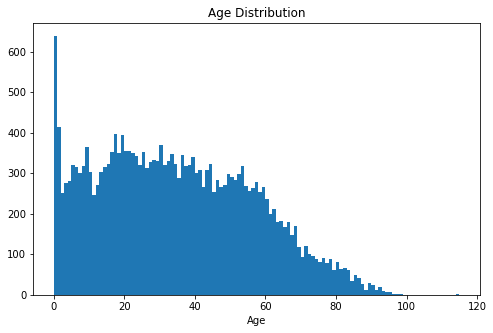

In [6]:
# investigating further on an even smaller bin size
binsize = 1
bins = np.arange(0, Did_Not_show_up['Age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = Did_Not_show_up, x = 'Age', bins = bins)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

The greater population of the patients are between ages 0 to 50 The distribution shows a very high peak for Age 0. The Newborns have shown to constitute a greater part of the population. Ages 1 to 20 constitute about 50% of the the population. As the age is increasing, their population decreases. 

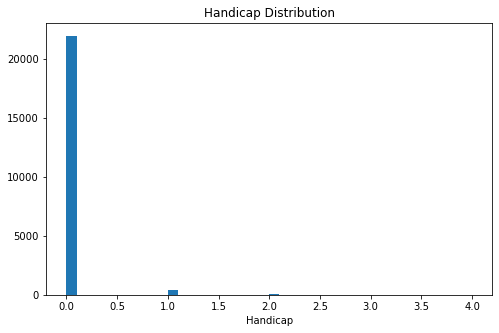

In [7]:
# plotting the handicap ditribution
binsize = 0.1
bins = np.arange(0, Did_Not_show_up['Handicap'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = Did_Not_show_up, x = 'Handicap', bins = bins)
plt.title("Handicap Distribution")
plt.xlabel('Handicap')
plt.show()

The Handicap distribution is already showing us a category of 0 to 4.  With the highest population at 0. More than 80% of the patient population are non handicaps meaning they have a few number of handicaps

### **Handicap Vs Scholarship count**

The Bolsa scholarship program aims at alleviating poverty, by providing financial aid to the families. Therefore anyone that is a beneficiary should be able to have access to funds and can afford to visit the health centres.

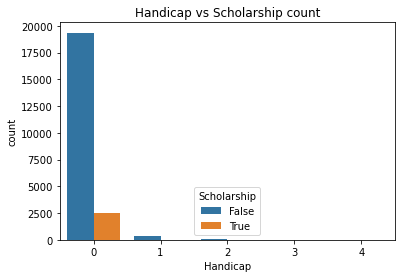

In [8]:
# plotting a handicap vs scholarship countplot
sns.countplot(data = Did_Not_show_up, x = 'Handicap', hue = 'Scholarship').set(title ='Handicap vs Scholarship count');

Here, we can see that more than 70% of the patient population are not handicapped, also they are not beneficiaries of the scholarship program as well. Less than 30% of the population of the Non handicap population are beneficiaries of the scholarship. The rest of the handicap population seem not to be beneficiaries as well.

### **Handicap vs SMS Received**

The SMS receieved is categorized into True or False. Therefore its either you received the sms or not, regardless of the number of times the messages were sent.

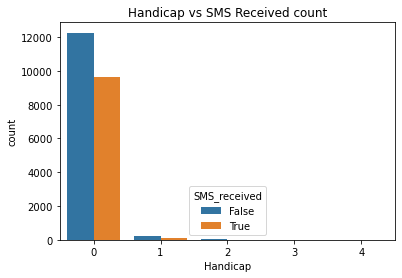

In [9]:
# plotting a handicap vs sms received countplot
sns.countplot(data = Did_Not_show_up, x = 'Handicap', hue = 'SMS_received').set(title ='Handicap vs SMS Received count');

This chart shows us that more than 90% of the population are without any form of disability. In this non handicap population, the number of persons that did not receive the SMS is about 30% greater than those that receive the sms. Also for those with disabilities, just a few number of them received the sms. A lot of them did not rceive the sms.

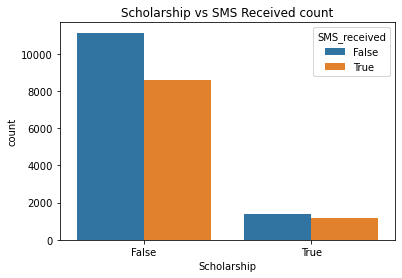

In [10]:
#plotting scholarship vs sms received countplot
sns.countplot(data = Did_Not_show_up, x = 'Scholarship', hue = 'SMS_received').set(title ='Scholarship vs SMS Received count');

We can also see the same type of relationship existing between SMS received and handicapped playing out here.  This chart shows us that more than 90% of the population are not beneficiaries of the scholarship program. In this Non beneficiary population, the number of persons that did not received the SMS is about 30% greater than those that receive the SMS.

### **Interplay between Age, Handicap and SMS Received**

Lets look at how these factors affect ecah other when placed together in a group.

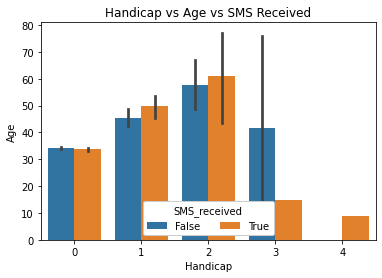

In [11]:
# plotting a barplot to show the relationship between Handicap, Age, and sms received
ax = sns.barplot(data = Did_Not_show_up, x = 'Handicap', y = 'Age', hue = 'SMS_received')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'SMS_received')
ax.set(title='Handicap vs Age vs SMS Received');

Those without disability, their age spans from 0 to 35, and they have an almost equal distribution of SMS received, meaning that half of the population received and half did not receive the sms. Those with 1 disability, their age spans from 0 to 51, and they also have an almost equal ditributution of sms received. Suprisingly those with 2 forms of disability received more SMS than others. For those with 3 and 4 disability, more than half of their population did not receive the sms.

Receiving sms is an important factor because if you do not receive the sms, you wont know that you've been scheduled for an appointment, thereby not showing up. 

So lets us find out why some persons received the sms but yet did not show up for their appointment.

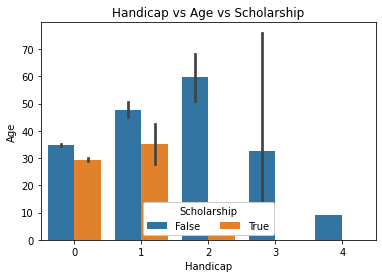

In [12]:
# plotting a barplot to show the relationship between Handicap, Age, and Scholarship
ax = sns.barplot(data = Did_Not_show_up, x = 'Handicap', y = 'Age', hue = 'Scholarship')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Scholarship');
ax.set(title='Handicap vs Age vs Scholarship');

In the previous barchart we noticed those with 2 disabilities received more sms but still did not show up for their appointment. It is evident in this barchart that more than 70% of the level 2 population (those with 2 disabilities) are not beneficiaries of the scholarship. Patients with 3 or 4 disability are not even benficiaries of the bolsa scholarship program, not one of them. Those with 1 or 2 disability still has quite a number of them who are also not beneficiaries of the scholarship program.

### **Generate Slideshow**

Run the command below to generate the HTML slideshow.

In [13]:
# The command below will generate the HTML slideshow. 
!jupyter nbconvert Part_2_no_show_appointment.ipynb --to slides --post serve --no-input --no-prompt 